# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
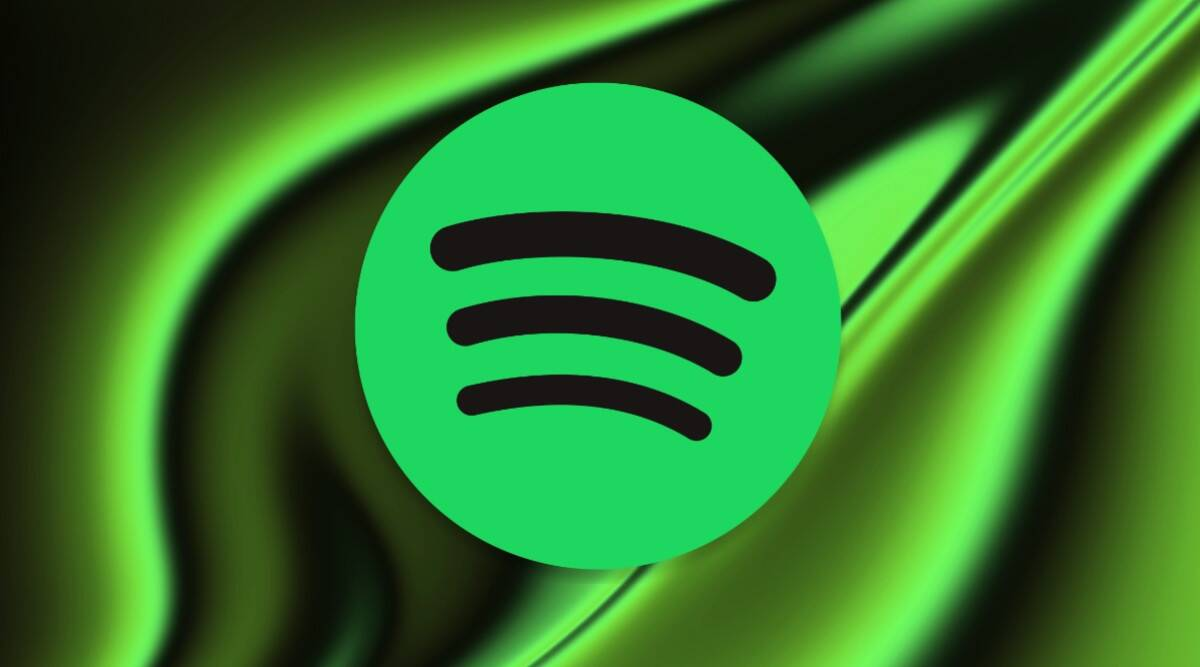
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [2]:
%pwd

'/mnt/mamads/uni/8/Data Mining/HW/project/DM_Project'

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [4]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [5]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [6]:
# To be completed
songs=spotify_df.groupby('artist_name').size().sort_values(ascending=False)
songs

artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Length: 69, dtype: int64

## Q: Get the average duration of songs by each of the artists in minutes

In [7]:
# To be completed'
average=(spotify_df.groupby('artist_name')['duration_ms']).mean()/60000
average

artist_name
Abbas Ghaderi            5.074705
Abdolhosein Mokhtabad    6.228769
Afshin Moghaddam         4.100780
Ali Lohrasbi             3.602079
Ali Zand Vakili          4.854786
                           ...   
Siavash Ghomayshi        4.341582
Sirvan Khosravi          4.352529
Soheil Nafissi           3.063580
Tohi                     3.523408
Xaniar Khosravi          3.934065
Name: duration_ms, Length: 69, dtype: float64

## Q: list of artist's unique names

In [8]:
# To be completed
artist=spotify_df['artist_name'].unique()
artist

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

## Q: Plot average duration of tracks by year

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


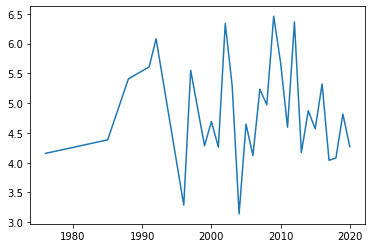

In [9]:
# To be completed
average_year=spotify_df.dropna().groupby('album_release_year')['duration_ms'].mean()/60000
plt.plot(average_year.index,average_year.values)
plt.show()


## Q: Plot average loudness of tracks by year

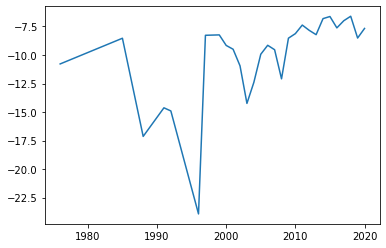

In [10]:
# To be completed
# To be completed
average_loudness=spotify_df.dropna().groupby('album_release_year')['loudness'].mean()
plt.plot(average_loudness.index,average_loudness.values)
plt.show()

## Q: Music attributes of songs over the years


In [11]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
attributes=spotify_df.dropna().groupby('album_release_year')[target_cols].mean()
# To be completed
attributes

,acousticness,danceability,energy,speechiness,liveness,valence
album_release_year,,,,,,
1976,0.826000,0.446500,0.351000,0.038100,0.211000,0.551000
1985,0.876000,0.696000,0.524000,0.050700,0.334000,0.504000
1988,0.972000,0.457500,0.317500,0.112000,0.131500,0.602500
1991,0.952333,0.380667,0.234667,0.038067,0.126333,0.355000
1992,0.107000,0.739000,0.417000,0.149000,0.080300,0.545000
1996,0.907900,0.422200,0.165090,0.056570,0.133400,0.319800
1997,0.047700,0.708000,0.778000,0.052800,0.253000,0.884000
1999,0.034000,0.708000,0.894000,0.055500,0.210000,0.717000
2000,0.178000,0.503000,0.623000,0.043900,0.062000,0.232000


## Q: Plot top 10 popular tracks (Bar Chart)

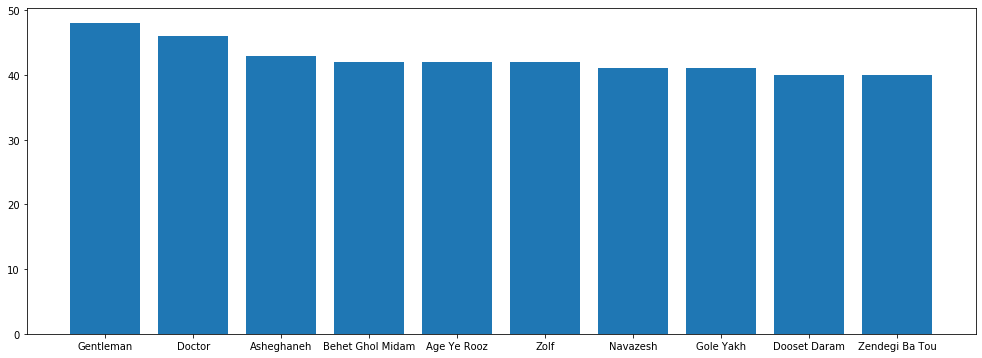

In [12]:
# To be completed
popular_songs=spotify_df.nlargest(11,'popularity')
plt.figure(figsize=(17,6))
plt.bar(popular_songs['track_name'],popular_songs['popularity'])
plt.show()


## Q: Plot top 10 popular artist (Bar Chart)

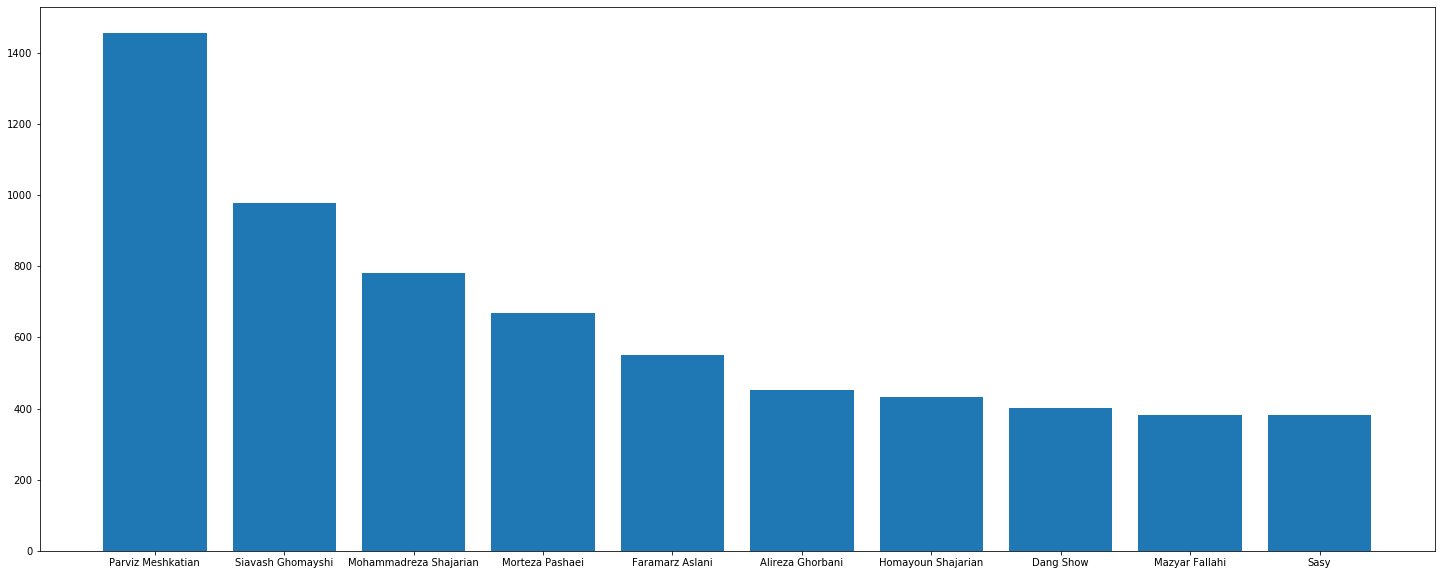

In [13]:
# To be completed
# To be completed
popular_songs=spotify_df.groupby('artist_name')['popularity'].sum().nlargest(10)
plt.figure(figsize=(25,10))
plt.bar(popular_songs.index,popular_songs.values)
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

Most correlated features with 'duration_ms':
danceability          0.210401
valence               0.200632
energy                0.193684
acousticness          0.170713
popularity            0.150982
track_number          0.136570
loudness              0.129694
speechiness           0.102299
mode                  0.089504
album_total_tracks    0.084771
instrumentalness      0.084382
tempo                 0.055874
time_signature        0.055702
album_release_year    0.046045
disc_number           0.035092
key                   0.031191
explicit              0.018728
liveness              0.018118
Name: duration_ms, dtype: float64


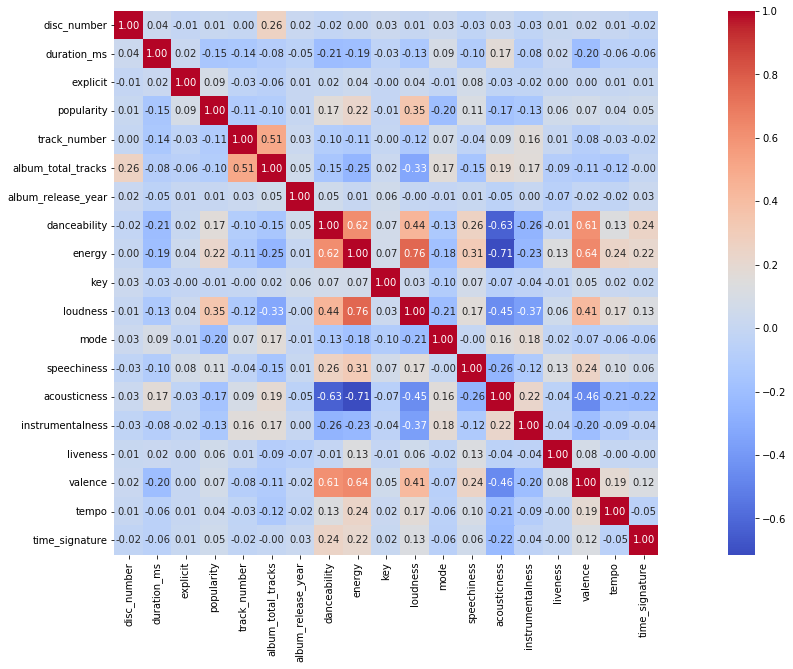

In [14]:
# To be completed
correlation_duration=spotify_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_duration, annot=True, cmap='coolwarm', fmt=".2f", square=True)
most_corr_features_duration = correlation_duration['duration_ms'].abs().sort_values(ascending=False)[1:]
print("Most correlated features with 'duration_ms':")
print(most_corr_features_duration)

plt.show()

Most correlated features with 'popularity':
loudness              0.345591
energy                0.223515
mode                  0.198692
acousticness          0.166836
danceability          0.166421
duration_ms           0.150982
instrumentalness      0.133704
speechiness           0.114274
track_number          0.110817
album_total_tracks    0.095055
explicit              0.085311
valence               0.072353
liveness              0.060086
time_signature        0.054152
tempo                 0.039718
disc_number           0.014592
key                   0.005923
album_release_year    0.005247
Name: popularity, dtype: float64


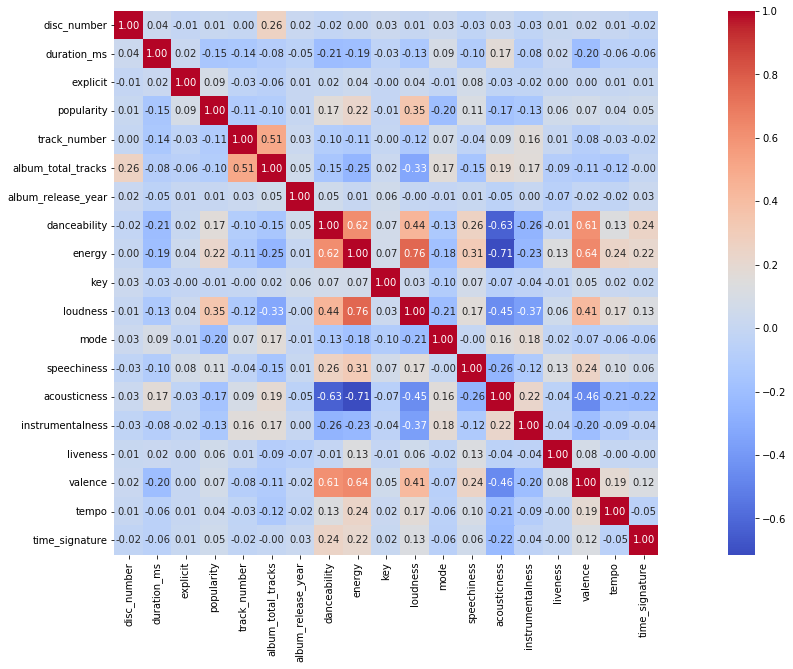

In [15]:
# To be completed
# To be completed
correlation_duration=spotify_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_duration, annot=True, cmap='coolwarm', fmt=".2f", square=True)
most_corr_features_duration = correlation_duration['popularity'].abs().sort_values(ascending=False)[1:]
print("Most correlated features with 'popularity':")
print(most_corr_features_duration)

plt.show()

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

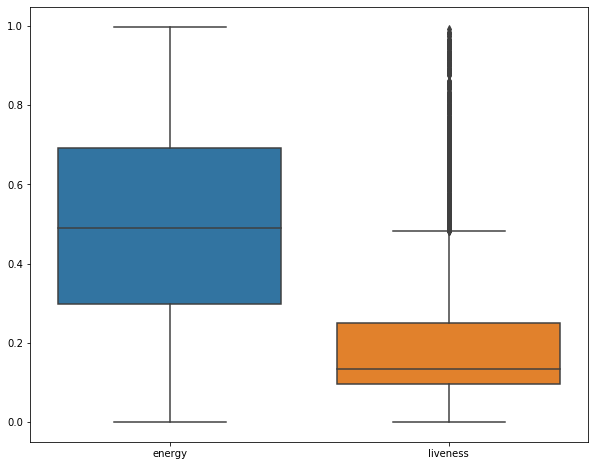

In [16]:
# To be completed
plt.figure(figsize=(10, 8))
sns.boxplot(data=spotify_df[['energy', 'liveness']])

# Show the plots
plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [17]:
# To be completed
spotify_df.isna().sum()

track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64

# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [18]:
# To be completed
categorical_features = ['track_name_farsi', 'album_href', 'key_name', 'mode_name', 'key_mode']
spotify_df[categorical_features] = spotify_df[categorical_features].fillna("None")

In [19]:
# To be completed
# we use median to fill na values bacouse if we choose other approches outliers and noises maybe give wrong resluts
spotify_df['popularity'].fillna(spotify_df['popularity'].median(),inplace=True)
spotify_df.isna().sum()

track_id                 0
disc_number              0
duration_ms              0
explicit                 0
track_name               0
track_name_farsi         0
artist_name              0
artist_name_farsi        0
popularity               0
track_number             0
album_href               0
album_id                 0
album_name               0
album_release_date       0
album_total_tracks    9701
album_release_year       0
track_href               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
key_name                 0
mode_name                0
key_mode                 0
dtype: int64

# Determine your desired features here

In [20]:
music_feature_cols = [ 
   'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo',
    'duration_ms',
    'album_release_year'
]

In [21]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name','popularity']].dropna()
tracks_feature_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms,album_release_year,artist_name,popularity
0,0.839,0.437,0.390,0.000035,0.1360,-7.170,0.0299,0.3300,131.913,446880,2020,Salar Aghili,20.0
1,0.970,0.379,0.146,0.000360,0.0812,-10.008,0.0414,0.3460,105.634,851920,2020,Salar Aghili,20.0
2,0.664,0.437,0.453,0.002070,0.1100,-5.392,0.0349,0.5010,94.651,293160,2020,Salar Aghili,20.0
3,0.915,0.488,0.138,0.006580,0.2120,-12.287,0.0451,0.4450,110.967,648720,2020,Salar Aghili,20.0
4,0.657,0.301,0.443,0.000008,0.1200,-5.702,0.0334,0.4100,148.053,273480,2020,Salar Aghili,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.946,0.356,0.499,0.005460,0.3530,-10.805,0.0452,0.3960,146.591,397505,1985,Shahram Nazeri,20.0
10628,0.982,0.318,0.163,0.061400,0.6670,-17.538,0.0690,0.1610,72.379,3522173,2008,Shahram Nazeri,20.0
10629,0.883,0.213,0.218,0.019400,0.2630,-15.865,0.0350,0.1390,86.645,3402706,2008,Shahram Nazeri,20.0
10630,0.842,0.242,0.304,0.223000,0.7980,-13.286,0.0369,0.2100,77.819,3342733,2008,Shahram Nazeri,20.0


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [22]:
# # To be completed
scaler = StandardScaler()
selected_cols=tracks_feature_df[music_feature_cols]
tracks_feature_df[music_feature_cols] = scaler.fit_transform(selected_cols)
tracks_feature_df







,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms,album_release_year,artist_name,popularity
0,0.721928,-0.428643,-0.440144,-0.448047,-0.369816,0.629863,-0.561985,-0.504217,0.420102,0.932542,0.164880,Salar Aghili,20.0
1,1.134163,-0.765201,-1.449424,-0.446904,-0.723920,0.013646,-0.400182,-0.437288,-0.460848,3.321961,0.164880,Salar Aghili,20.0
2,0.171232,-0.428643,-0.179551,-0.440888,-0.537822,1.015921,-0.491636,0.211093,-0.829030,0.025714,0.164880,Salar Aghili,20.0
3,0.961087,-0.132704,-1.482515,-0.425022,0.121278,-0.481195,-0.348124,-0.023160,-0.282070,2.123240,0.164880,Salar Aghili,20.0
4,0.149205,-1.217813,-0.220915,-0.448140,-0.473204,0.948610,-0.512741,-0.169569,0.961163,-0.090383,0.164880,Salar Aghili,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1.058639,-0.898663,0.010723,-0.428962,1.032386,-0.159407,-0.346717,-0.228132,0.912152,0.641268,0.014256,Shahram Nazeri,20.0
10628,1.171925,-1.119167,-1.379105,-0.232174,3.061378,-1.621347,-0.011856,-1.211161,-1.575654,19.074364,0.113238,Shahram Nazeri,20.0
10629,0.860389,-1.728453,-1.151603,-0.379924,0.450827,-1.258088,-0.490229,-1.303190,-1.097415,18.369602,0.113238,Shahram Nazeri,20.0
10630,0.731369,-1.560174,-0.795874,0.336312,3.907869,-0.698108,-0.463496,-1.006189,-1.393289,18.015808,0.113238,Shahram Nazeri,20.0


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)


(10632, 2)


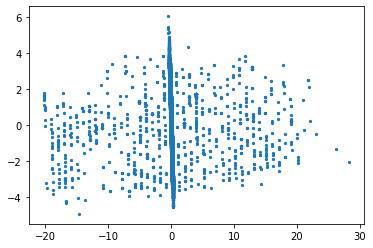

In [23]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


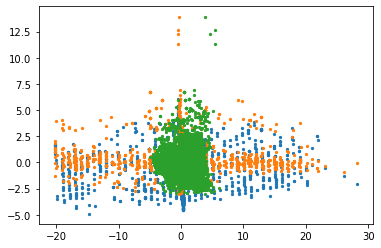

In [24]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [25]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [26]:
df = tracks_feature_df
regression_features = [ 'danceability', 'energy', 'loudness']
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [27]:
from sklearn.preprocessing import PolynomialFeatures


feat =PolynomialFeatures(degree=2)
x_poly = feat.fit_transform(x_train)
feat.fit(x_poly, y_train)
linear = LinearRegression()
linear.fit(x_poly, y_train)
print(linear.intercept_)
print(linear.coef_)

19.77885222280175
[ 0.          0.08519646 -0.25927016  0.59384143  0.10507091 -0.04949586
  0.06398068 -0.00946262  0.02356443  0.11563735]


## Evaluate Regression Algorithm

In [28]:

y_pred = linear.predict(feat.fit_transform(x_test))
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output


,Actual,Predicted
0,13.0,20.097239
1,20.0,20.541080
2,20.0,20.621552
3,20.0,19.753530
4,20.0,19.886468
...,...,...
3185,20.0,20.339778
3186,12.0,19.836068
3187,20.0,19.534793
3188,20.0,19.818486


In [29]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9956581720288042
Mean Squared Error: 8.779783114726813
Root Mean Squared Error: 2.9630698801626014


# Classification

## Prepare Labels

In [30]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [31]:
# To be completed

tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: x in sonnati_artists)


In [32]:
tracks_feature_df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms,album_release_year,popularity
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000
mean,-3.983103e-16,-2.994010e-16,-5.881091e-17,7.485025e-17,-7.485025e-17,-2.486098e-16,-8.019670e-18,-1.924721e-16,3.421726e-16,-1.336612e-17,2.566294e-16,20.009970
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,3.080871
min,-1.918195e+00,-2.964434e+00,-2.049304e+00,-4.481700e-01,-1.248615e+00,-5.934864e+00,-9.826719e-01,-1.884641e+00,-4.002013e+00,-1.680127e+00,-8.528307e+00,0.000000
25%,-8.735159e-01,-8.058199e-01,-8.206920e-01,-4.481700e-01,-6.295786e-01,-5.634327e-01,-4.747521e-01,-8.106294e-01,-8.134842e-01,-5.028027e-01,1.003269e-01,20.000000
50%,3.631892e-01,-8.047930e-02,-3.064107e-02,-4.478620e-01,-3.892012e-01,2.179660e-01,-3.509379e-01,-1.235549e-01,2.329099e-02,-2.075528e-01,1.218447e-01,20.000000
75%,8.572419e-01,8.189431e-01,8.131829e-01,-3.957539e-01,3.668246e-01,7.497731e-01,-3.682961e-02,7.632628e-01,6.252294e-01,2.653078e-01,1.476660e-01,20.000000
max,1.215981e+00,2.629393e+00,2.074783e+00,3.052098e+00,5.161450e+00,2.050765e+00,1.222887e+01,2.214799e+00,3.371699e+00,2.176604e+01,1.648803e-01,48.000000


In [33]:

tracks_feature_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms,album_release_year,artist_name,popularity,is_sonnati
0,0.721928,-0.428643,-0.440144,-0.448047,-0.369816,0.629863,-0.561985,-0.504217,0.420102,0.932542,0.164880,Salar Aghili,20.0,True
1,1.134163,-0.765201,-1.449424,-0.446904,-0.723920,0.013646,-0.400182,-0.437288,-0.460848,3.321961,0.164880,Salar Aghili,20.0,True
2,0.171232,-0.428643,-0.179551,-0.440888,-0.537822,1.015921,-0.491636,0.211093,-0.829030,0.025714,0.164880,Salar Aghili,20.0,True
3,0.961087,-0.132704,-1.482515,-0.425022,0.121278,-0.481195,-0.348124,-0.023160,-0.282070,2.123240,0.164880,Salar Aghili,20.0,True
4,0.149205,-1.217813,-0.220915,-0.448140,-0.473204,0.948610,-0.512741,-0.169569,0.961163,-0.090383,0.164880,Salar Aghili,20.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1.058639,-0.898663,0.010723,-0.428962,1.032386,-0.159407,-0.346717,-0.228132,0.912152,0.641268,0.014256,Shahram Nazeri,20.0,True
10628,1.171925,-1.119167,-1.379105,-0.232174,3.061378,-1.621347,-0.011856,-1.211161,-1.575654,19.074364,0.113238,Shahram Nazeri,20.0,True
10629,0.860389,-1.728453,-1.151603,-0.379924,0.450827,-1.258088,-0.490229,-1.303190,-1.097415,18.369602,0.113238,Shahram Nazeri,20.0,True
10630,0.731369,-1.560174,-0.795874,0.336312,3.907869,-0.698108,-0.463496,-1.006189,-1.393289,18.015808,0.113238,Shahram Nazeri,20.0,True


## Create Classification Dataset

In [34]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati','artist_name','popularity']).values
y = tracks_feature_df['is_sonnati'].values

In [35]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 12)
y.shape=(10632,)


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [37]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [38]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.831974921630094,
 'confusion': array([[1831,  264],
       [ 272,  823]]),
 'f1': 0.7543538038496791,
 'precision': 0.7571297148114076,
 'recall': 0.7515981735159817}


In [39]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
dataset = (x, y)
pprint(fit_and_eval(XGBClassifier(max_depth=9, n_estimators = 400), dataset))

{'acc': 0.8909090909090909,
 'confusion': array([[1923,  172],
       [ 176,  919]]),
 'f1': 0.8408051235132663,
 'precision': 0.842346471127406,
 'recall': 0.8392694063926941}


In [40]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
dataset = (x, y)
pprint(fit_and_eval(RandomForestClassifier(max_depth=20, random_state=RANDOM_SEED), dataset))

{'acc': 0.8799373040752351,
 'confusion': array([[1896,  199],
       [ 184,  911]]),
 'f1': 0.8263038548752835,
 'precision': 0.8207207207207208,
 'recall': 0.8319634703196347}
